In [1]:
with open("../data/stats/papers-with-code-text-datasets-20.01.2022.html") as f:
    html = f.read()

In [30]:
from bs4 import BeautifulSoup
import pandas as pd

In [19]:
soup = BeautifulSoup(html, 'html.parser')
items = soup.find_all('a', class_='filter-item')

In [26]:
name_num_dict = dict()

for item in items:
    arr = item.text.split("\n        \n            ")
    name, number = arr[0].replace("\n","").strip(), int(arr[1].replace("\n","").strip())
    if number <= 0:
        continue
    name_num_dict[name] = number

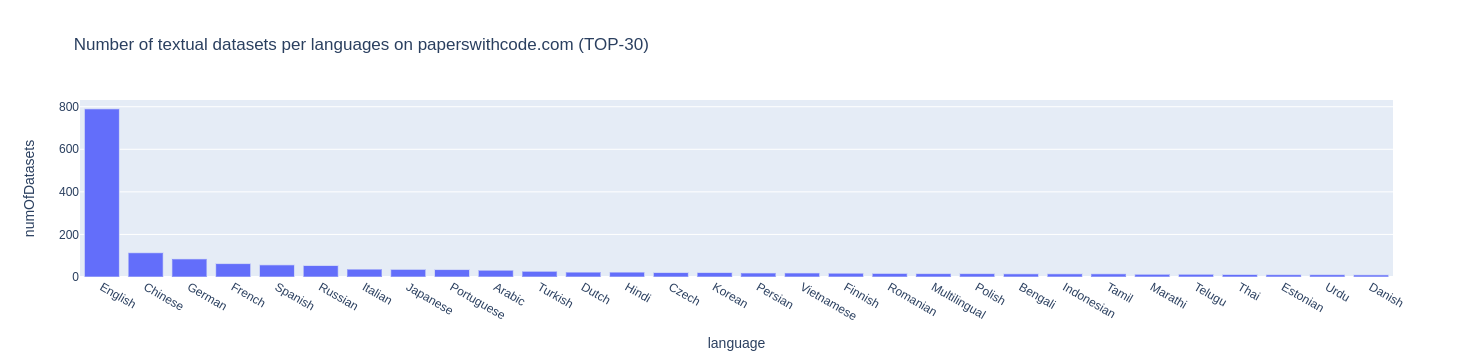

In [44]:
import plotly.express as px
import plotly.io as pio
df = pd.DataFrame.from_dict({"language": list(name_num_dict.keys())[:30], "numOfDatasets": list(name_num_dict.values())[:30]})
fig = px.bar(df, x='language', y='numOfDatasets', title="Number of textual datasets per languages on paperswithcode.com (TOP-30)")
fig.show()
pio.write_image(fig, '../data/stats/languages-numOf-datasets.jpg', width=1500, height=500, format='jpeg')